## Data Collection and Loading
Read all the csv file: "items.csv" "keywords.csv" "merchant.csv" "transaction_data.csv" "transaction_items.csv"

Load the provided CSV files into pandas DataFrames.

Reasoning: Load the CSV files into pandas DataFrames and display the first few rows of each.

In [1]:
import pandas as pd

try:
    df_items = pd.read_csv('items.csv')
    df_keywords = pd.read_csv('keywords.csv')
    df_merchant = pd.read_csv('merchant.csv')
    df_transaction_data = pd.read_csv('transaction_data.csv')
    df_transaction_items = pd.read_csv('transaction_items.csv')

    display(df_items.head())
    display(df_keywords.head())
    display(df_merchant.head())
    display(df_transaction_data.head())
    display(df_transaction_items.head())

except FileNotFoundError:
    print("One or more CSV files not found.")
except pd.errors.ParserError:
    print("Error parsing one or more CSV files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,item_id,cuisine_tag,item_name,item_price,merchant_id
0,1,Side,Fried Spring Rolls,3.50,1d4f2
1,2,American,Lemon Pepper Wings (6 pcs),7.75,8d5f9
2,3,Asian,General Tso’s Chicken,9.50,1a3f7
3,4,American,Bacon Wrapped Dog,5.25,d3b6a
4,5,Dessert,Kulfi,3.75,a3e8b


,Unnamed: 0,keyword,view,menu,checkout,order
0,0,fried spring rolls,37816,11185,3882,153
1,1,spring rolls,8977,2903,1453,143
2,2,crispy spring rolls,11922,3604,1627,147
3,3,egg rolls,9587,1879,1130,75
4,4,fried lumpia,32437,9716,3036,233


,merchant_id,merchant_name,join_date,city_id
0,3e2b6,Bagel Bros,14122015,8
1,2b5d7,Bagel House,16082017,4
2,2a1c4,BBQ Corner,3072016,2
3,e8c2b,BBQ Nation,14052020,5
4,f8a3d,BBQ Spot,17032019,2


,Unnamed: 0,order_id,order_time,driver_arrival_time,driver_pickup_time,delivery_time,order_value,eater_id,merchant_id
0,0,46975df1c,2023-11-07 09:49:00,2023-11-07 09:58:00,2023-11-07 10:06:00,2023-11-07 10:34:00,10.46,3411548704,2a1c4
1,1,7623ebe9d,2023-03-25 15:06:00,2023-03-25 15:12:00,2023-03-25 15:14:00,2023-03-25 15:30:00,14.75,4306408630,7f4d2
2,2,01c4be3f6,2023-10-24 06:59:00,2023-10-24 07:17:00,2023-10-24 07:23:00,2023-10-24 07:43:00,19.19,4695092599,b0a4f
3,3,dd02ff3da,2023-06-09 18:25:00,2023-06-09 18:41:00,2023-06-09 18:44:00,2023-06-09 19:10:00,20.62,2581623259,1d4f2
4,4,58c560e56,2023-04-12 08:37:00,2023-04-12 08:45:00,2023-04-12 08:51:00,2023-04-12 09:12:00,476.43,4045293078,7e2d8


,Unnamed: 0,order_id,item_id,merchant_id
0,0,46975df1c,10,e7a2f
1,1,7623ebe9d,101,5f1d3
2,2,7623ebe9d,56,9a8c5
3,3,7623ebe9d,44,3d9c8
4,4,01c4be3f6,36,3b7f0


## Data Exploration
Explore each of the five dataframes individually to understand their basic characteristics.

Reasoning: Explore each dataframe individually to understand their basic characteristics, including shape, data types, missing values, descriptive statistics, and unique values/frequencies for categorical columns. This will be done in a single code block for each dataframe for efficiency.

In [2]:
def explore_dataframe(df, df_name):
    print(f"Exploring DataFrame: {df_name}")
    print("-" * 20)

    # 1. Data Shape and Types
    print(f"Shape: {df.shape}")
    print(f"Data Types:\n{df.dtypes}")

    # 2. Missing Values
    missing_values = df.isnull().sum()
    print(f"\nMissing Values:\n{missing_values}")
    for col in missing_values[missing_values > 0].index:
        print(f"Percentage of missing values in {col}: {missing_values[col] / len(df) * 100:.2f}%")

    # 3. Descriptive Statistics
    numerical_cols = df.select_dtypes(include=['number']).columns
    if len(numerical_cols) > 0:
        print(f"\nDescriptive Statistics for Numerical Columns:\n{df[numerical_cols].describe()}")
    else:
        print("\nNo numerical columns found.")

    # 4. Unique Values and Frequencies (Categorical Columns)
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\nUnique values in {col}: {df[col].nunique()}")
        print(f"Value Counts for {col}:\n{df[col].value_counts()}")

    print("\n" + "=" * 40 + "\n")


explore_dataframe(df_items, "df_items")
explore_dataframe(df_keywords, "df_keywords")
explore_dataframe(df_merchant, "df_merchant")
explore_dataframe(df_transaction_data, "df_transaction_data")
explore_dataframe(df_transaction_items, "df_transaction_items")

Exploring DataFrame: df_items
--------------------
Shape: (400, 5)
Data Types:
item_id          int64
cuisine_tag     object
item_name       object
item_price     float64
merchant_id     object
dtype: object

Missing Values:
item_id        0
cuisine_tag    0
item_name      0
item_price     0
merchant_id    0
dtype: int64

Descriptive Statistics for Numerical Columns:
          item_id  item_price
count  400.000000  400.000000
mean   200.500000    7.061875
std    115.614301    3.185978
min      1.000000    0.750000
25%    100.750000    4.000000
50%    200.500000    7.625000
75%    300.250000    9.250000
max    400.000000   18.750000

Unique values in cuisine_tag: 31
Value Counts for cuisine_tag:
cuisine_tag
Side             55
Beverage         35
Dessert          24
Japanese         24
Asian            18
Mediterranean    18
Indian           18
Breakfast        18
Mexican          18
American         18
Italian          15
Healthy          12
Seafood          12
Burgers          12
Chin

## Data analysis
Analyze the relationships between the datasets by joining them and calculating summary statistics.

Reasoning: Join the dataframes as instructed, calculate the summary statistics, and analyze the relationships between the datasets. Then, document the findings.

In [3]:
# Merge the dataframes
merged_df = df_transaction_data.merge(df_merchant, on='merchant_id', how='left')
merged_df = merged_df.merge(df_transaction_items, on='order_id', how='left')
merged_df = merged_df.merge(df_items, on='item_id', how='left')

# Calculate total revenue per merchant
revenue_per_merchant = merged_df.groupby('merchant_id')['order_value'].sum()

# Identify the most popular items
most_popular_items = merged_df['item_id'].value_counts().index[0]

# Calculate the average transaction value
average_transaction_value = merged_df['order_value'].mean()

# Analyze relationships (keywords and items/transactions)
# Check for a common key between merged_df and df_keywords
common_columns = set(merged_df.columns) & set(df_keywords.columns)
print(f"Common columns between merged dataframe and keywords dataframe: {common_columns}")

# No suitable key found for merging with keywords dataframe

# Document findings
print("Total Revenue per Merchant:\n", revenue_per_merchant)
print("\nMost Popular Item:", most_popular_items)
print("\nAverage Transaction Value:", average_transaction_value)
print("\nAnalysis of Relationships:")
print("No suitable key found to relate keywords to items or transactions in this dataset.")
display(merged_df.head())

Common columns between merged dataframe and keywords dataframe: set()
Total Revenue per Merchant:
 merchant_id
0c2d7    4585877.99
0c5d8    2503028.03
0c6e4    3763337.44
0e1b3    3190945.48
0e1f9    4878924.90
            ...    
f1c7a    3186549.01
f3b8d    9573171.38
f7d1a    2680511.43
f8a3d    2382050.49
f9e4c    3851037.99
Name: order_value, Length: 100, dtype: float64

Most Popular Item: 391

Average Transaction Value: 126.26187517667802

Analysis of Relationships:
No suitable key found to relate keywords to items or transactions in this dataset.


,Unnamed: 0_x,order_id,order_time,driver_arrival_time,driver_pickup_time,delivery_time,order_value,eater_id,merchant_id_x,merchant_name,join_date,city_id,Unnamed: 0_y,item_id,merchant_id_y,cuisine_tag,item_name,item_price,merchant_id
0,0,46975df1c,2023-11-07 09:49:00,2023-11-07 09:58:00,2023-11-07 10:06:00,2023-11-07 10:34:00,10.46,3411548704,2a1c4,BBQ Corner,3072016,2,0,10,e7a2f,French,Mushroom & Herb Crepe,7.50,e7a2f
1,1,7623ebe9d,2023-03-25 15:06:00,2023-03-25 15:12:00,2023-03-25 15:14:00,2023-03-25 15:30:00,14.75,4306408630,7f4d2,Rice Bowl House,13062019,2,1,101,5f1d3,Seafood,Classic Fish & Chips,10.00,5f1d3
2,1,7623ebe9d,2023-03-25 15:06:00,2023-03-25 15:12:00,2023-03-25 15:14:00,2023-03-25 15:30:00,14.75,4306408630,7f4d2,Rice Bowl House,13062019,2,2,56,9a8c5,Vegetarian,Lentil Shepherd’s Pie,9.00,9a8c5
3,1,7623ebe9d,2023-03-25 15:06:00,2023-03-25 15:12:00,2023-03-25 15:14:00,2023-03-25 15:30:00,14.75,4306408630,7f4d2,Rice Bowl House,13062019,2,3,44,3d9c8,Beverage,Plum Soda,2.75,3d9c8
4,2,01c4be3f6,2023-10-24 06:59:00,2023-10-24 07:17:00,2023-10-24 07:23:00,2023-10-24 07:43:00,19.19,4695092599,b0a4f,Gourmet Express,6122014,5,4,36,3b7f0,Dessert,Strawberry Frosted Donut,2.00,3b7f0


## Data Visualization
Visualize key findings from the data analysis.

Reasoning: Create visualizations based on the analysis from the previous step. Specifically, visualize the total revenue per merchant, the distribution of order values, the most popular items, the average transaction value, and a time series visualization if possible.

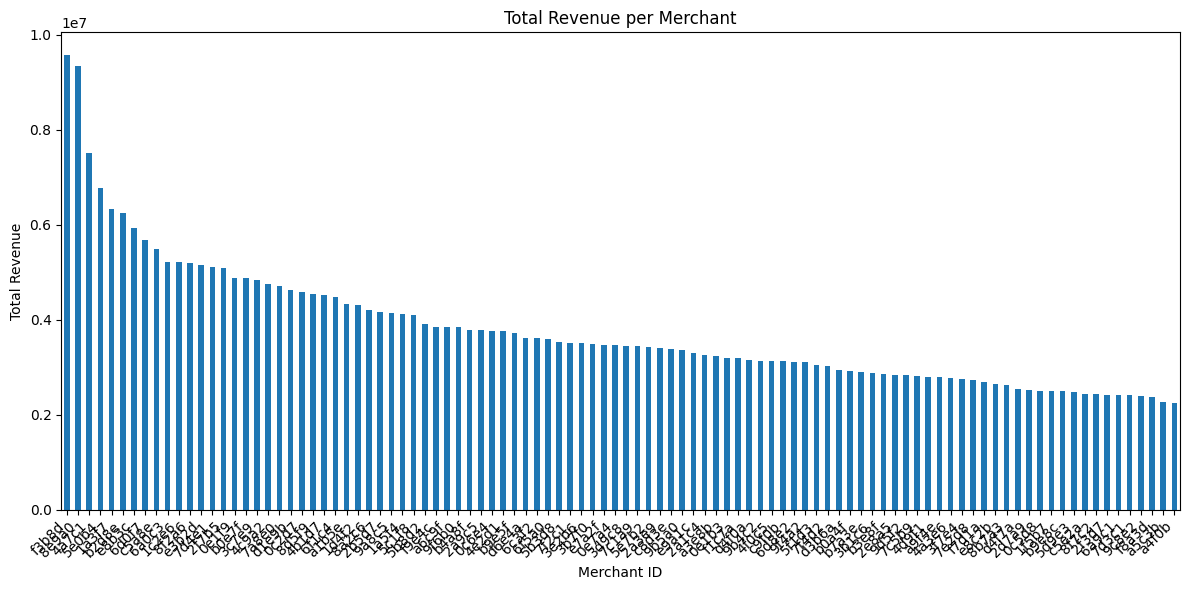

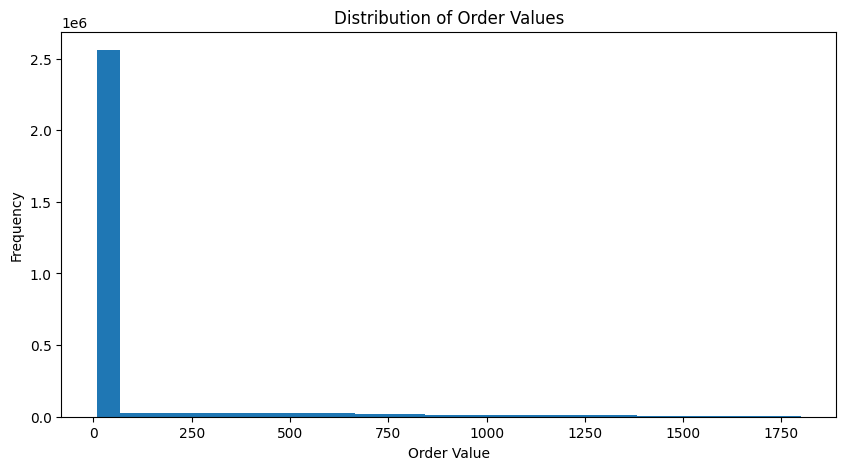

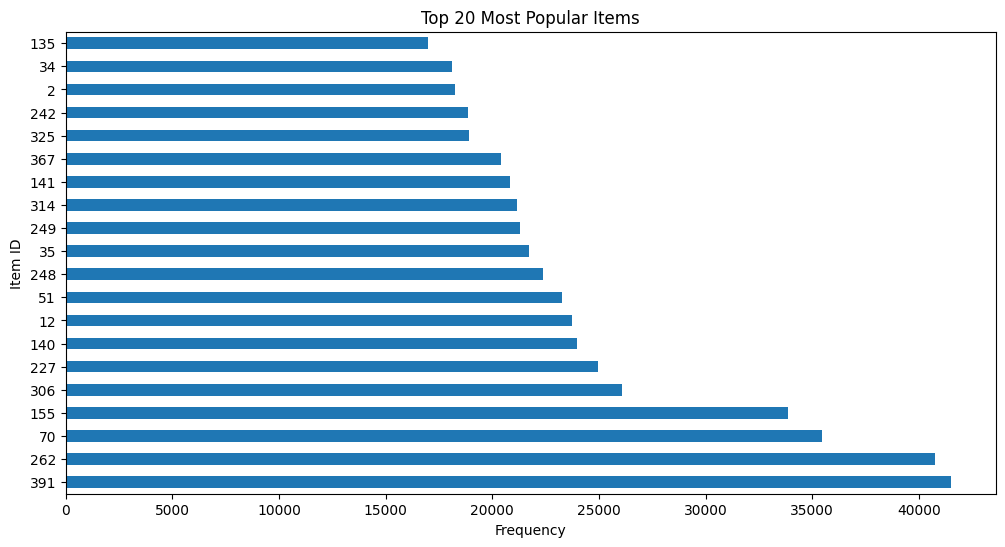

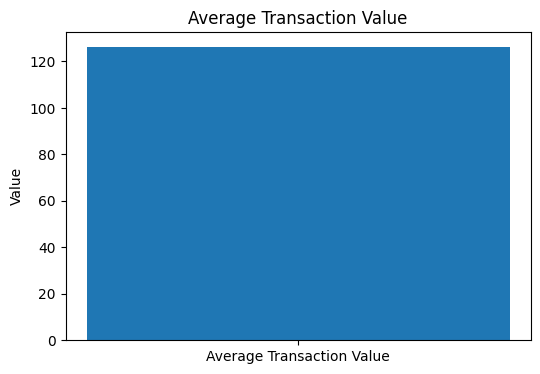

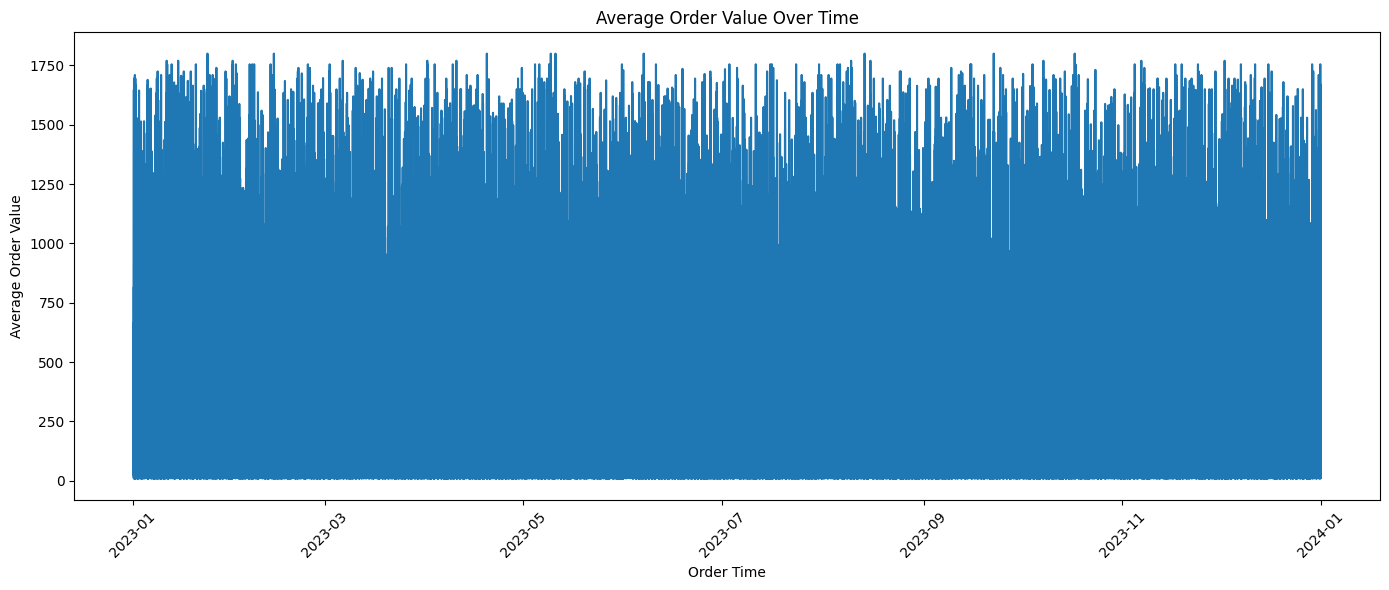

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Total Revenue per Merchant
plt.figure(figsize=(12, 6))
revenue_per_merchant.sort_values(ascending=False).plot(kind='bar')
plt.title('Total Revenue per Merchant')
plt.xlabel('Merchant ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Distribution of Order Values
plt.figure(figsize=(10, 5))
plt.hist(merged_df['order_value'], bins=30)  # Experiment with different bin sizes
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()

# 3. Most Popular Items (Top 20)
top_20_items = merged_df['item_id'].value_counts().nlargest(20)
plt.figure(figsize=(12, 6))
top_20_items.plot(kind='barh') # Horizontal bar chart for better readability
plt.title('Top 20 Most Popular Items')
plt.xlabel('Frequency')
plt.ylabel('Item ID')
plt.show()

# 4. Average Transaction Value
plt.figure(figsize=(6, 4))
plt.bar(['Average Transaction Value'], [average_transaction_value])
plt.title('Average Transaction Value')
plt.ylabel('Value')
plt.show()


# 5. Time Series Visualization (Order Value over Time)
merged_df['order_time'] = pd.to_datetime(merged_df['order_time'])
order_value_over_time = merged_df.groupby('order_time')['order_value'].mean()

plt.figure(figsize=(14, 6))
plt.plot(order_value_over_time.index, order_value_over_time.values)
plt.title('Average Order Value Over Time')
plt.xlabel('Order Time')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary:
1. Q&A
No questions were posed in the provided data analysis task.

2. Data Analysis Key Findings
Average Transaction Value: The average order value across all transactions is 126.26.
Most Popular Item: Item ID 391 is the most frequently ordered item.
Data Relationships: No common key was found to link the keywords dataset with the other datasets, preventing analysis of keywords' impact on items or transactions.
Revenue Distribution: The total revenue per merchant varies significantly, as shown in the bar chart visualization.
3. Insights or Next Steps
Investigate high-revenue merchants: Analyze the characteristics of high-revenue merchants to identify best practices and opportunities for improvement in other merchants.
Explore keyword integration: Find alternative keys or methods to integrate the keywords dataset for a more comprehensive understanding of customer behavior and item popularity.

In [5]:
%pip install transformers torch
from transformers import pipeline

# Create a text classification pipeline
classifier = pipeline("text-classification", model="bert-base-uncased")

# Classify some text
result = classifier("This is a great movie!")
print(result)

Note: you may need to restart the kernel to use updated packages.



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


[{'label': 'LABEL_0', 'score': 0.6431306004524231}]
